A glaring limitation of Vanilla Neural Networks (and also Convolutional Networks) is that their API is too constrained: they accept a fixed-sized vector as input (e.g. an image) and produce a fixed-sized vector as output (e.g. probabilities of different classes). Not only that: These models perform this mapping using a fixed amount of computational steps (e.g. the number of layers in the model). The core reason that recurrent nets are more exciting is that they allow us to operate over sequences of vectors: Sequences in the input, the output, or in the most general case both.

In [ ]:
# importing the necessary Libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
%matplotlib inline

In [3]:
# importing datasets.
dataset = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset.shape

(1258, 6)

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


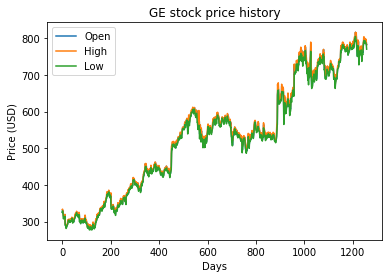

In [27]:
# getting information about the prices
plt.figure()
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

The prices do not vary much in this case.

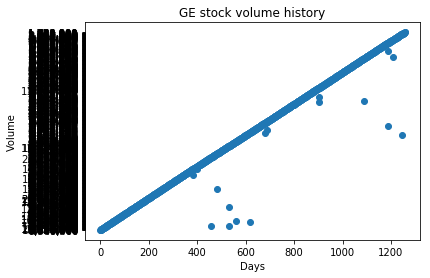

In [31]:
# Plotting the volume infromation 
plt.figure()
plt.scatter(dataset.index,dataset["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

we got a uniform plot with some outliers.

In [6]:
# using the open column for analysis.
set1 = dataset.iloc[:, 1:2].values # set1 contains the values for open column in the dataset.

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
set1_scaled = sc.fit_transform(set1)

In [9]:
set1_scaled # the values are in the 0 to 1 range.

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = [] # stock price at t+1 timestamp.

In [11]:
# Generating X_train and Y_train form the scaled set.
for i in range(60, 1258):
    X_train.append(set1_scaled[i-60:i, 0])
    y_train.append(set1_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [14]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [15]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Initialising the RNN
regressor = Sequential()

In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [21]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0269
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==

In [23]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# Reshaping the inputs.
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


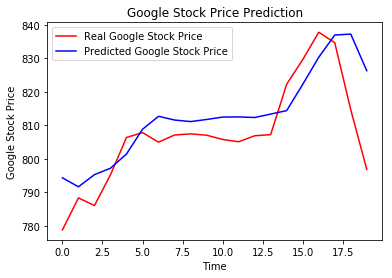

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()